In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

pandas.set_option("display.precision", 2)

input_table = '../../Data/Processed/retail/bigtable_data.parquet'

# Load Time Series Data 

In [5]:
data = pandas.read_parquet(input_table)
grain_cols = ['Store','Dept']
date_col = ['Date']
target_col = ['Weekly_Sales']
print('data shape:', data.shape)
print('data columns:', data.columns.tolist())

# mess with data
data['MarkDown1'] = np.nan


data.head()

data shape: (59000, 16)
data columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315.0,42.31,2.57,NaN,0.0,0.0,0.0,0.0,211.1,8.11
1,1,2,2010-02-05,50605.27,False,A,151315.0,42.31,2.57,NaN,0.0,0.0,0.0,0.0,211.1,8.11
2,1,3,2010-02-05,13740.12,False,A,151315.0,42.31,2.57,NaN,0.0,0.0,0.0,0.0,211.1,8.11
3,1,4,2010-02-05,39954.04,False,A,151315.0,42.31,2.57,NaN,0.0,0.0,0.0,0.0,211.1,8.11
4,1,5,2010-02-05,32229.38,False,A,151315.0,42.31,2.57,NaN,0.0,0.0,0.0,0.0,211.1,8.11


# Show Table With One Entire Variable Missing

In [6]:
data.describe()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,59000.00,59000.00,59000.00,59000.00,0.0,59000.00,59000.00,59000.00,59000.00,59000.00,59000.00
mean,19053.35,143311.99,68.02,3.22,NaN,972.90,496.37,1187.81,1700.43,201.62,6.89
std,27478.29,73582.96,14.82,0.42,NaN,6061.88,5568.80,3813.97,3476.35,33.75,0.98
min,-1098.00,34875.00,28.84,2.51,NaN,-10.98,0.00,0.00,0.00,126.06,3.88
25%,2527.05,37392.00,56.99,2.76,NaN,0.00,0.00,0.00,0.00,211.26,6.49
50%,8138.18,202307.00,69.68,3.29,NaN,0.00,0.00,0.00,0.00,214.93,6.97
75%,23510.00,202505.00,81.02,3.59,NaN,9.48,5.59,577.14,2556.36,220.30,7.68
max,385051.04,205863.00,93.34,3.91,NaN,92523.94,83340.33,48159.86,36430.33,226.99,8.62


# Time Series Example

Text(0, 0.5, '$')

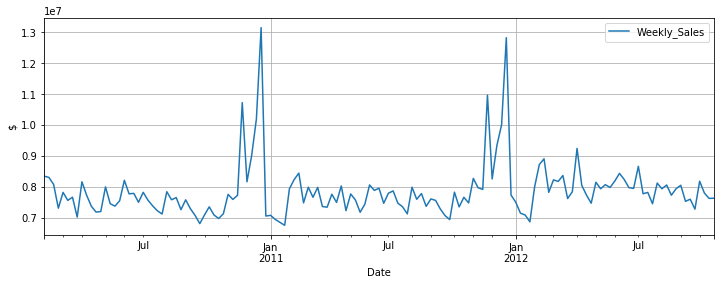

In [8]:
data.groupby(date_col)[target_col].sum().plot(figsize=(12,4), grid=True)
plt.ylabel('$')

# Simulate Some Inconsistencies in Data 

Text(0, 0.5, '$')

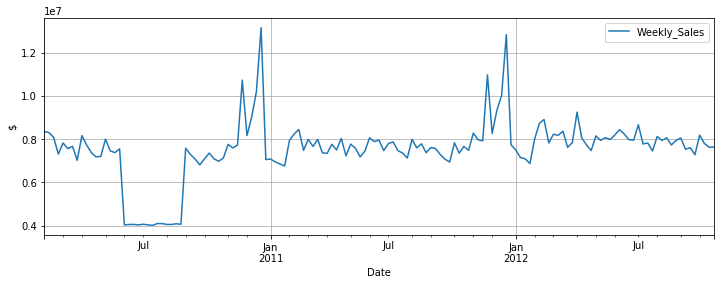

In [9]:
# Add inconsistency
X = data.copy()
X.loc[(X.Date >= '2010-06-01') & (X.Date < '2010-09-01'), target_col] = 9999
X.groupby(date_col)[target_col].sum().plot(figsize=(12,4), grid=True)
plt.ylabel('$')

# Negative Values in Time Series 

Text(0, 0.5, '$')

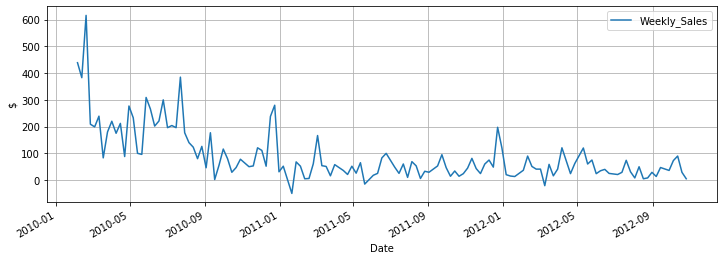

In [10]:
idx = ((data.Store == '1') & (data.Dept == '54')) # 47
data[idx].groupby(date_col)[target_col].sum().plot(figsize=(12,4), grid=True)
plt.ylabel('$')

# Time Series Values Distribution 

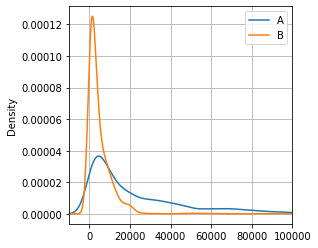

In [11]:
data.groupby('Type').Weekly_Sales.plot.kde(figsize=(4,4), legend=True)
plt.xlim([-10000, 100000])
plt.grid(True)

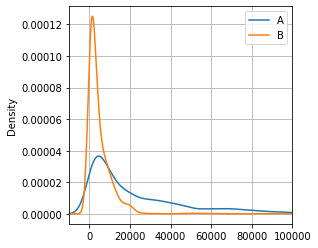

In [12]:
data.groupby('Type').Weekly_Sales.plot.kde(figsize=(4,4), legend=True)
plt.xlim([-10000, 100000])
plt.grid(True)

# Missing Data

Text(0, 0.5, '$')

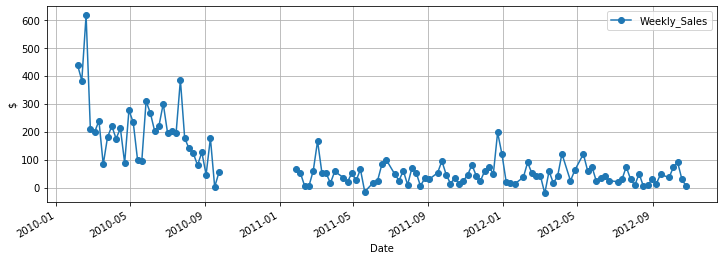

In [13]:
dx = ((data.Store == '1') & (data.Dept == '54')) # 47
X = data[idx].groupby(date_col)[target_col].sum()

# missing data
miss_data = np.arange(34,50)
X.iloc[miss_data] = np.nan
# Plot
X.plot(figsize=(12,4), marker='o')
plt.grid(True)
plt.ylabel('$')

# Data Imputation Time Series 

Text(0, 0.5, '$')

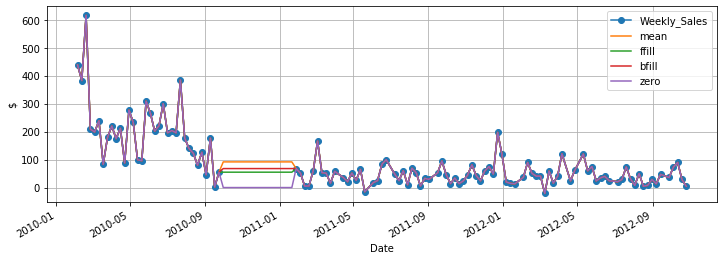

In [14]:
idx = ((data.Store == '1') & (data.Dept == '54')) # 47
X = data[idx].groupby(date_col)[target_col].sum()

# missing data
miss_data = np.arange(34,50)
X.iloc[miss_data] = np.nan
# Plot
X.plot(figsize=(12,4), grid=True, marker='o')

# Plot values imput mean
X.copy().fillna(X.mean()).rename({"Weekly_Sales":"mean"}, axis=1).plot(ax=plt.gca())


# Plot Fill forward
X.copy().fillna(method='ffill').rename({"Weekly_Sales":"ffill"}, axis=1).plot(ax=plt.gca())


X.copy().fillna(method='bfill').rename({"Weekly_Sales":"bfill"}, axis=1).plot(ax=plt.gca())

X.copy().fillna(0).rename({"Weekly_Sales":"zero"}, axis=1).plot(ax=plt.gca())
plt.grid()
plt.ylabel('$')

# Box Plot - Sales

Text(0, 0.5, '$')

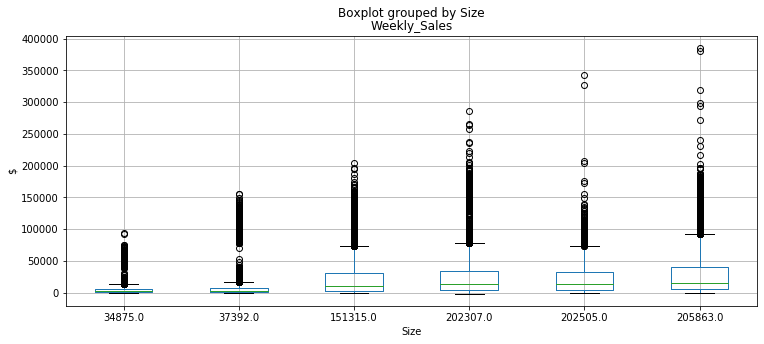

In [15]:
data.boxplot(target_col, 'Size', figsize=(12,5))
plt.ylabel('$')

# Box Plot -  Variables

Text(0, 0.5, '$')

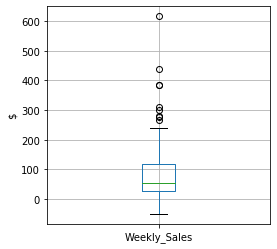

In [16]:
idx = ((data.Store == '1') & (data.Dept == '54')) # 47
X = data[idx].copy()

X.boxplot(target_col, figsize=(4,4))
plt.ylabel('$')

# Scatter-Plot

In [17]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

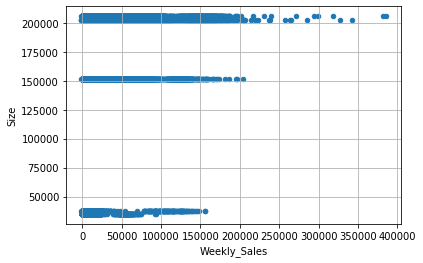

In [18]:
var1 = 'Weekly_Sales'
var2 = 'Size' # 'Temperature'


data.plot.scatter(var1, var2)

plt.grid()


Text(0, 0.5, 'Correlation')

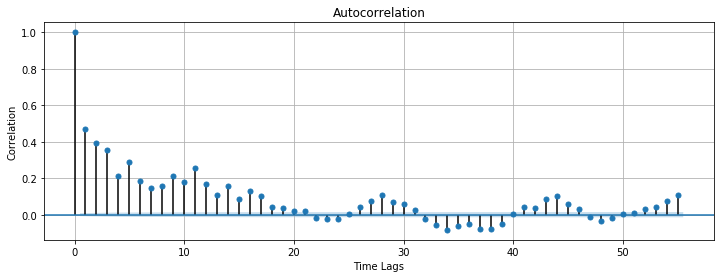

In [19]:
from statsmodels.graphics import tsaplots

plt.figure(figsize=(12,4))
tsaplots.plot_acf(data.Weekly_Sales, lags=55, ax=plt.gca())
plt.grid(True)
plt.xlabel('Time Lags')
plt.ylabel('Correlation')


In [20]:
pandas.scatter_matrix(data)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [21]:
data['Weekly_Sales_1'] = data.Weekly_Sales.shift(1)
data[['Weekly_Sales', 'Weekly_Sales_1']].head(10)
data[['Weekly_Sales', 'Weekly_Sales_1']].corr()

,Weekly_Sales,Weekly_Sales_1
Weekly_Sales,1.00,0.47
Weekly_Sales_1,0.47,1.00


In [22]:
data['Temperature_1'] = data.Temperature.shift(1)
data[['Weekly_Sales', 'Temperature_1']].corr()

,Weekly_Sales,Temperature_1
Weekly_Sales,1.00,-0.06
Temperature_1,-0.06,1.00
